# Problem 1

 - load the "student" dataset

 - discretize the attributes G1, G2, and G3 into five bins:
   fail[0,9], sufficient[10,11], satisfactory[12,13], good[14,15], excellent[16,20]

 - train different models to predict secondary school student performance
   (the target variable is the "G3" attribute)

 - evaluete trained models using different strategies

 - compare the results


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, r2_score


# Step 1: Load the "student" dataset
data = pd.read_csv("student.txt")

# Step 2: Discretize attributes G1, G2, and G3 into five bins
def discretize_grades(grade):
    if grade < 10:
        return "fail"
    elif grade <= 11:
        return "sufficient"
    elif grade <= 13:
        return "satisfactory"
    elif grade <= 15:
        return "good"
    else:
        return "excellent"

data["G1"] = data["G1"].apply(discretize_grades)
data["G2"] = data["G2"].apply(discretize_grades)
data["G3"] = data["G3"].apply(discretize_grades)

# Step 3: Train different models to predict G3
X = data.drop(columns=["G3"])
y = data["G3"]

X_encoded = pd.get_dummies(X)  # One-hot encoding for categorical features
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Classification Models
classifiers = [DecisionTreeClassifier(), RandomForestClassifier(), SVC(max_iter=1000), LogisticRegression(max_iter=1000)]

for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"{clf.__class__.__name__} - Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f}")


DecisionTreeClassifier - Accuracy: 0.67, F1 Score: 0.67
RandomForestClassifier - Accuracy: 0.75, F1 Score: 0.74
SVC - Accuracy: 0.38, F1 Score: 0.29
LogisticRegression - Accuracy: 0.76, F1 Score: 0.75


# Problem 2
- load the "vehicle" dataset

 - train different models to classify examples to one of four types 
   of vehicle (the target variable is the "Class" attribute)

 - evaluete trained models using different strategies

 - compare the results


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Load the "vehicle" dataset
data = pd.read_csv("vehicle.txt")

# Step 2: Prepare the data
X = data.drop(columns=["Class"])  # Features
y = data["Class"]  # Target variable

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Step 3: Train different classification models
classifiers = [
    RandomForestClassifier(n_estimators=100, random_state=42),
    SVC(kernel='linear'),
    KNeighborsClassifier(n_neighbors=5)
]
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Step 4: Evaluate the trained models using different strategies
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=le.classes_)
    confusion = confusion_matrix(y_test, y_pred)

    print(f"{clf.__class__.__name__} - Accuracy: {accuracy:.2f}")
    print(report)
    print("Confusion Matrix:")
    print(confusion)
    print()

RandomForestClassifier - Accuracy: 0.77
              precision    recall  f1-score   support

         bus       1.00      0.98      0.99        52
        opel       0.42      0.47      0.44        30
        saab       0.63      0.56      0.59        48
         van       0.91      0.97      0.94        40

    accuracy                           0.77       170
   macro avg       0.74      0.75      0.74       170
weighted avg       0.77      0.77      0.77       170

Confusion Matrix:
[[51  0  0  1]
 [ 0 14 15  1]
 [ 0 19 27  2]
 [ 0  0  1 39]]
SVC - Accuracy: 0.80
              precision    recall  f1-score   support

         bus       0.93      0.98      0.95        52
        opel       0.51      0.67      0.58        30
        saab       0.72      0.54      0.62        48
         van       0.97      0.97      0.97        40

    accuracy                           0.80       170
   macro avg       0.78      0.79      0.78       170
weighted avg       0.81      0.80      0.80  

# Problem 3
- Train a kNN model and visualize the k parameter with respect to knn's performance for k=1..20.
- Perform a similar visualization for SVMs and the C parameter.

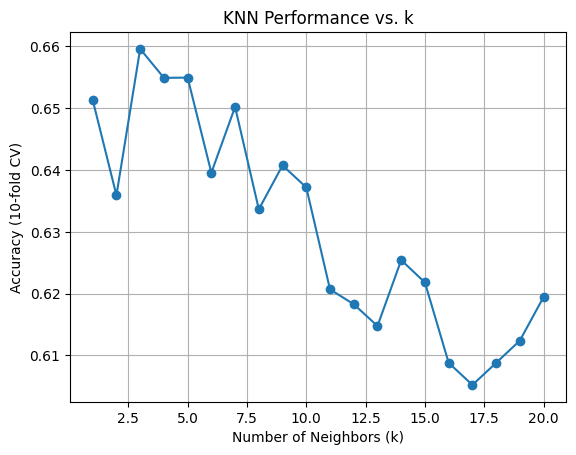

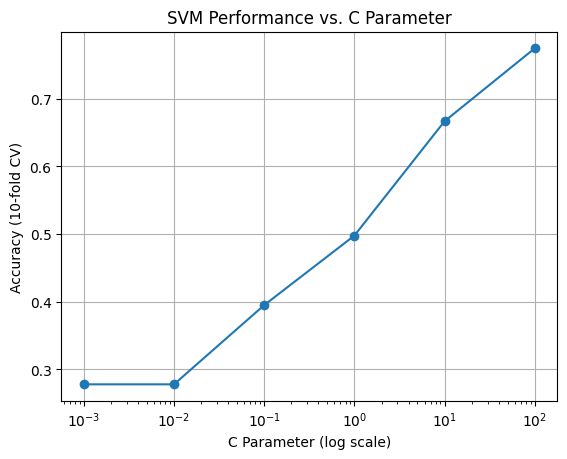

In [9]:
from sklearn.model_selection import cross_val_score, GridSearchCV
import matplotlib.pyplot as plt

# Step 1: Load the "vehicle" dataset
data = pd.read_csv("vehicle.txt")

# Step 2: Prepare the data
X = data.drop(columns=["Class"])  # Features
y = data["Class"]  # Target variable

# Encode the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Define the range of k values for KNN
k_values = list(range(1, 21))
knn_scores = []

# Define the range of C values for SVM
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
svm_scores = []

# Step 3: Compare KNN's performance across libraries using 10-fold cross-validation
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y_encoded, cv=10)
    knn_scores.append(scores.mean())

# Step 4: Visualize KNN's performance with respect to k
plt.plot(k_values, knn_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy (10-fold CV)')
plt.title('KNN Performance vs. k')
plt.grid(True)
plt.show()

# Step 5: Perform a similar visualization for SVMs and the C parameter
param_grid = {'C': C_values}
svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv=10)
grid_search.fit(X, y_encoded)
svm_scores = grid_search.cv_results_['mean_test_score']

# Step 6: Visualize SVM's performance with respect to C
plt.semilogx(C_values, svm_scores, marker='o')
plt.xlabel('C Parameter (log scale)')
plt.ylabel('Accuracy (10-fold CV)')
plt.title('SVM Performance vs. C Parameter')
plt.grid(True)
plt.show()